Importing modules

In [20]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

load dataset

In [21]:
df = pd.read_csv('IRIS.csv')

In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Prepare features and labels

In [23]:
X = df.drop(columns=['species'])
y = df['species']

In [24]:
# Encode species labels
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN Classifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# Make predictions
y_pred = knn.predict(X_test)

Accuracy: 100.00%


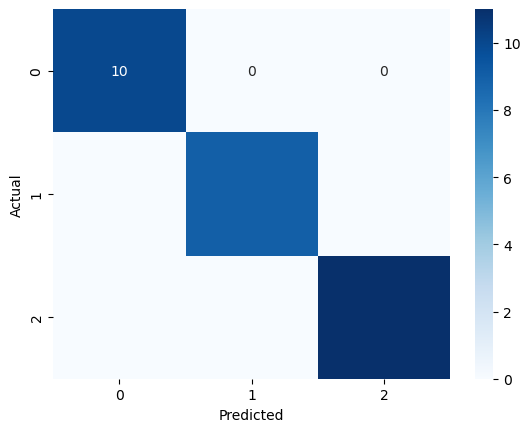

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
# New sample test data: [sepal length, sepal width, petal length, petal width]
sample_multiple = [[4.8, 3.0, 1.4, 0.3],  
                   [6.7, 3.1, 4.4, 1.4],  
                   [7.2, 3.6, 6.1, 2.5]]  

# Standardize the sample based on the same scaler used for training
samples_multiple_scaled = scaler.transform(sample_multiple)

# Predict species
pred_multiple = knn.predict(samples_multiple_scaled)

# Output predictions
for i, pred in enumerate(pred_multiple):
    print(f"Predicted species for new sample {i+1}: {df.species[pred]}")

Predicted species for new sample 1: Iris-setosa
Predicted species for new sample 2: Iris-setosa
Predicted species for new sample 3: Iris-setosa
